In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
def find_closest_centroids(X, centroids):
    # 获取样本数量m和聚类中心数量k
    m = X.shape[0]
    k = centroids.shape[0]
    # 初始化每个样本的聚类索引
    idx = np.zeros(m)
    # 遍历每个样本
    for i in range(m):
        # 初始化最小距离
        min_dist = 1000000
        # 遍历每个聚类中心
        for j in range(k):
            # 计算样本与聚类中心的距离
            dist = np.sum((X[i, :] - centroids[j, :])**2)
            # 如果距离小于最小距离，则更新最小距离和聚类索引
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [4]:
data2 = pd.read_csv('ex7data2.csv')
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [5]:
X=data2.values

In [6]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

e:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


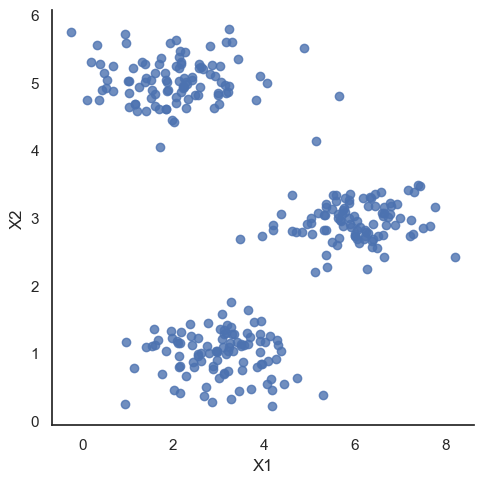

In [7]:
sb.set(context="notebook", style="white")
sb.lmplot(x='X1', y='X2', data=data2, fit_reg=False)
plt.show()

In [8]:
def compute_centroids(X, idx, k):
    # 获取样本数量m和特征数量n
    m, n = X.shape
    # 初始化聚类中心
    centroids = np.zeros((k, n))
    for i in range(k):
        # 找到属于第i个聚类的样本的索引
        indices = np.where(idx == i)
        # 计算该聚类的新聚类中心（取属于该聚类的样本的平均值）
        centroids[i, :] = (np.sum(X[indices, :], axis=1) /
                           len(indices[0])).ravel()
    return centroids

In [9]:
compute_centroids(data2.values, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [10]:
def run_k_means(X, initial_centroids, max_iters):
    # 获取样本数量m和特征数量n
    m, n = X.shape
    # 获取聚类中心数量k
    k = initial_centroids.shape[0]
    # 初始化每个样本的聚类索引
    idx = np.zeros(m)
    # 初始化聚类中心
    centroids = initial_centroids

    for i in range(max_iters):
        # 找到每个样本点与最近的聚类中心的索引
        idx = find_closest_centroids(X, centroids)
        # 根据样本点的聚类索引重新计算聚类中心
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

In [11]:
idx, centroids = run_k_means(X, initial_centroids, 10)

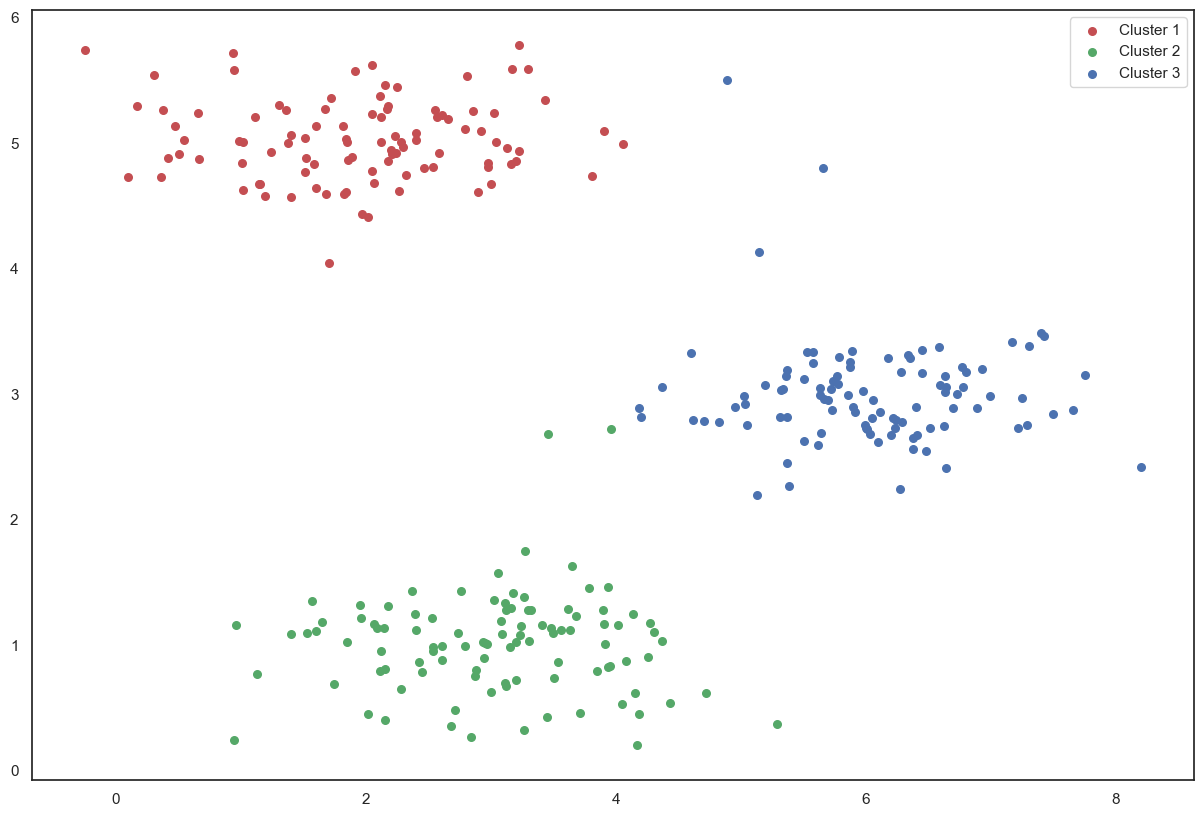

In [12]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [13]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i, :] = X[idx[i], :]

    return centroids
init_centroids(X, 3)

array([[1.70725482, 4.04231479],
       [5.03611162, 2.92486087],
       [6.69451358, 2.89056083]])

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

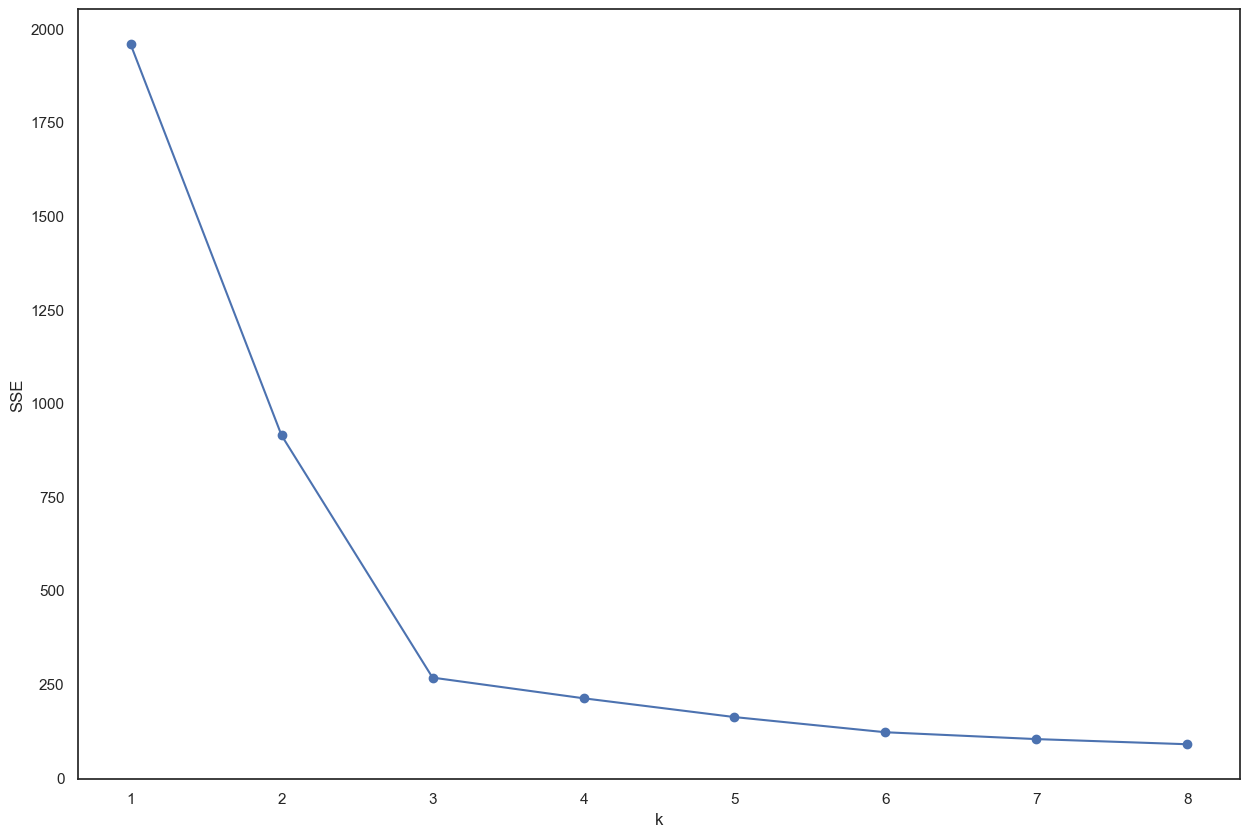

In [14]:
from sklearn.cluster import KMeans

# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data2)
    SSE.append(estimator.inertia_)
X = range(1, 9)

plt.figure(figsize=(15, 10))
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

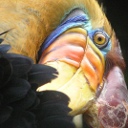

In [16]:
from IPython.display import Image
Image(filename='bird_small.png')

In [18]:
image_data = loadmat('bird_small.mat')
# image_data

In [19]:
A = image_data['A']
A.shape

(128, 128, 3)

In [20]:
# 归一化数值范围
A = A / 255.
# 重塑数组形状
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [21]:
# 随机初始化聚类中心
initial_centroids = init_centroids(X, 16)
# 运行K-means算法
idx, centroids = run_k_means(X, initial_centroids, 10)
# 最后一次获取最近的聚类中心
idx = find_closest_centroids(X, centroids)
# 将每个像素映射到聚类中心的值
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384, 3)

In [22]:
# 重塑原始维度
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

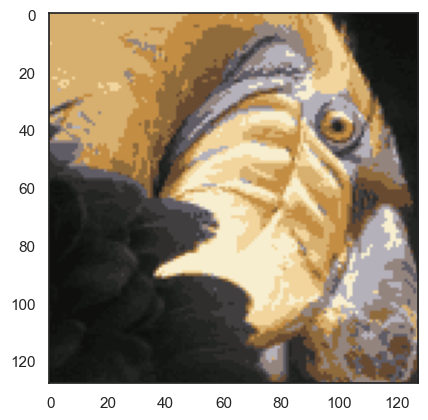

In [23]:
plt.imshow(X_recovered)
plt.show()

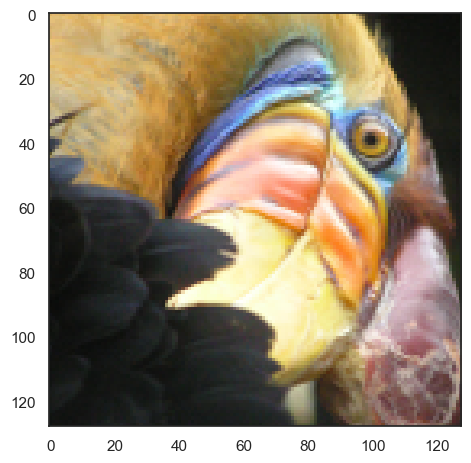

In [25]:
from skimage import io

# 将图像转换为浮点数，否则聚类后的颜色会变得奇怪
pic = io.imread('bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [26]:
# serialize data
data = pic.reshape(128*128, 3)

In [27]:
from sklearn.cluster import KMeans#导入kmeans库

model = KMeans(n_clusters=16, n_init=100)
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [28]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


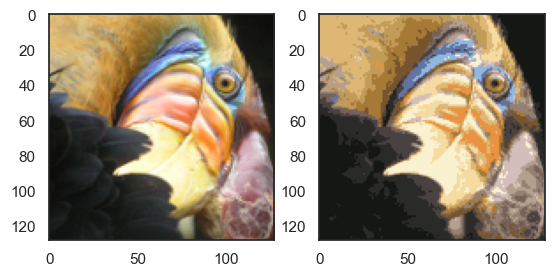

In [29]:
compressed_pic = centroids[C].reshape((128,128,3))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()

In [30]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [32]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

In [33]:
X = StandardScaler().fit_transform(X)

In [34]:
def plot_dbscan(MyEps, MiniSample):
    db = DBSCAN(eps=MyEps, min_samples=MiniSample).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # 标签中的簇数，忽略噪声点（如果存在）。
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("估计的簇的数量: %d" % n_clusters_)
    print("估计的噪声点数量: %d" % n_noise_)
    print("同一性(Homogeneity): %0.4f" %
          metrics.homogeneity_score(labels_true, labels))
    print("完整性(Completeness): %0.4f" %
          metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("ARI(Adjusted Rand Index): %0.4f" %
          metrics.adjusted_rand_score(labels_true, labels))
    print("AMI(Adjusted Mutual Information): %0.4f" %
          metrics.adjusted_mutual_info_score(labels_true, labels))
    print("轮廓系数(Silhouette Coefficient): %0.4f" %
          metrics.silhouette_score(X, labels))

    # #############################################################################
    # 画出结果

    # 黑色点代表噪声点
    unique_labels = set(labels)
    colors = [
        plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
    ]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 1, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("簇的数量为: %d" % n_clusters_, fontsize=18)

#     plt.savefig(str(MyEps) + str(MiniSample) + '.png')#保存图片
    plt.show()

估计的簇的数量: 3
估计的噪声点数量: 18
同一性(Homogeneity): 0.9530
完整性(Completeness): 0.8832
V-measure: 0.917
ARI(Adjusted Rand Index): 0.9517
AMI(Adjusted Mutual Information): 0.9165
轮廓系数(Silhouette Coefficient): 0.6255


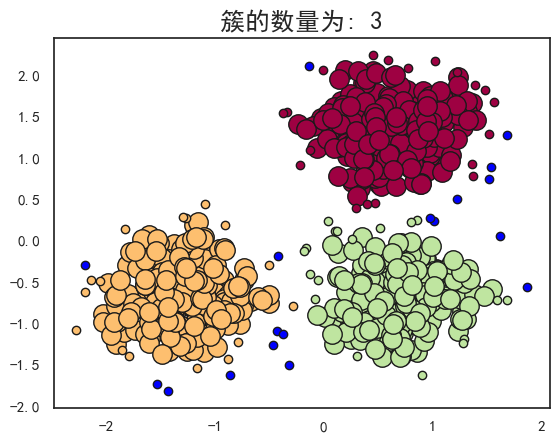

In [35]:
plot_dbscan(0.3, 10)

估计的簇的数量: 12
估计的噪声点数量: 516
同一性(Homogeneity): 0.3128
完整性(Completeness): 0.2489
V-measure: 0.277
ARI(Adjusted Rand Index): 0.0237
AMI(Adjusted Mutual Information): 0.2673
轮廓系数(Silhouette Coefficient): -0.3659


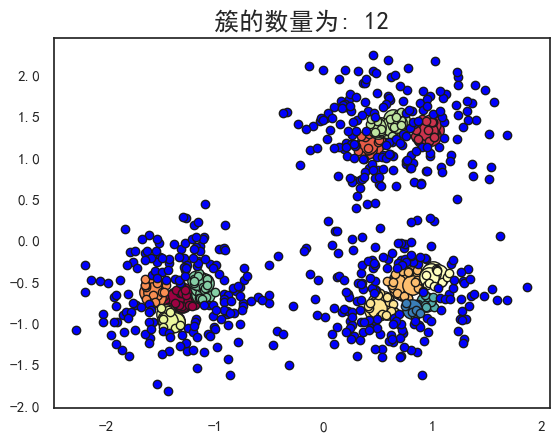

In [36]:
plot_dbscan(0.1, 10)

估计的簇的数量: 1
估计的噪声点数量: 2
同一性(Homogeneity): 0.0010
完整性(Completeness): 0.0586
V-measure: 0.002
ARI(Adjusted Rand Index): -0.0000
AMI(Adjusted Mutual Information): -0.0011
轮廓系数(Silhouette Coefficient): 0.0611


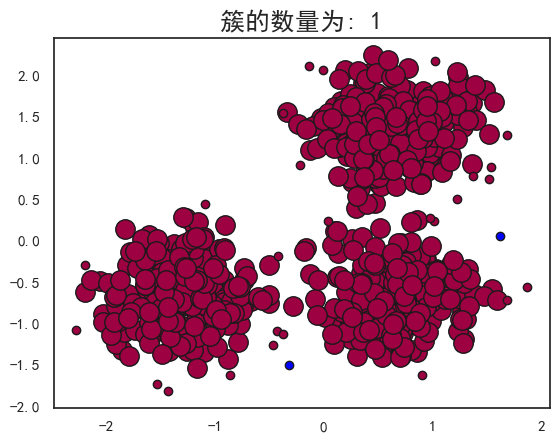

In [37]:
plot_dbscan(0.4, 10)

估计的簇的数量: 2
估计的噪声点数量: 13
同一性(Homogeneity): 0.5365
完整性(Completeness): 0.8263
V-measure: 0.651
ARI(Adjusted Rand Index): 0.5414
AMI(Adjusted Mutual Information): 0.6495
轮廓系数(Silhouette Coefficient): 0.3845


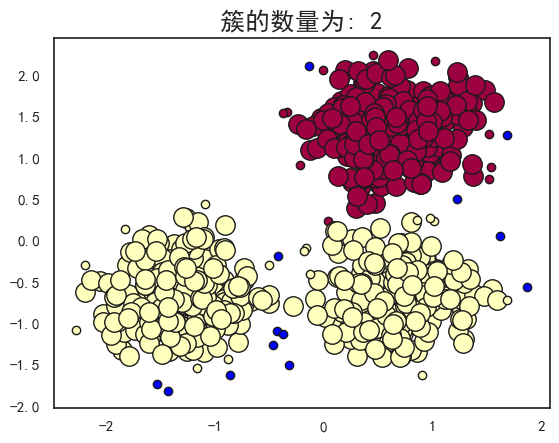

In [38]:
plot_dbscan(0.3, 6)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [40]:
def plot_dendrogram(model, **kwargs):
    # 创建链接矩阵，然后绘制树状图

    # 创建每个节点下的样本计数
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # 绘制相应的树状图
    dendrogram(linkage_matrix, **kwargs)

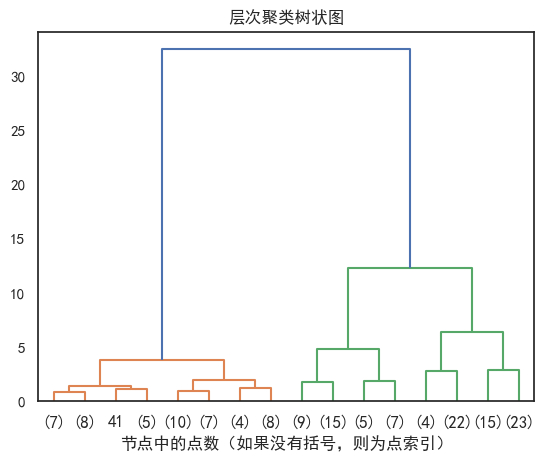

In [41]:
iris = load_iris()
X = iris.data
# 设置距离阈值=0可确保计算完整的树。
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("层次聚类树状图")
# 绘制树状图的前三级
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("节点中的点数（如果没有括号，则为点索引）")
plt.show()